In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# 종이 setosa를 만족하는 애들중에 petal_lenght만 출력
setosa_petal_len = iris[iris['species'] == 'setosa'] [['petal_length']]

#### 커널 밀도 추정은 커널 함수를 이용한 밀도 추정 방법 중 하나
#### 밀도 추정이란 추출된 데이터들을 이용해서 밀도함수를 구하는 것

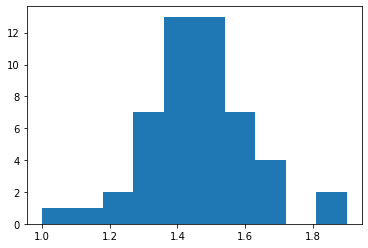

In [4]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(setosa_petal_len)
plt.show()

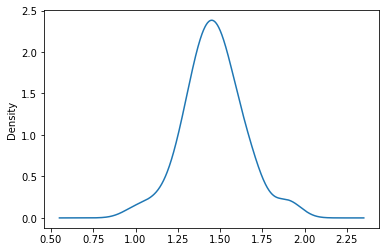

In [5]:
# Density
iris[iris['species']=='setosa']['petal_length'].plot.density()
plt.show()

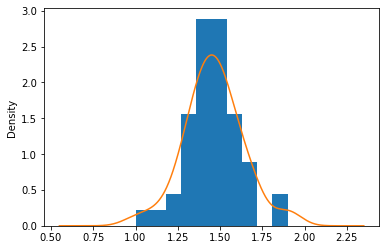

In [6]:
# 두 그래프 중첩
ax = iris[iris['species'] == 'setosa']['petal_length'].plot.hist(density = True)
iris[iris['species'] == 'setosa']['petal_length'].plot.density(ax = ax)
plt.show()

### 왜도 (Skewness)
- 데이터의 분포에 따라서 오른쪽 OR 왼쪽으로 치우쳤는지 확인
    1. Nagative skewness : 데이터의 중심이 오른쪽이 치우쳐졌을때
    2. Positive skewness : 데이터의 중심이 왼쪽에 치우쳐졌을때

### 첨도 (Kurtosis)
- 데이터가 얼마나 평균에 모여있는지
    1. Leptokurtic(고점) : 정규분포바다 많이 몰려 있어서 뾰족
    2. Mesokutic(중첨) : 중점 정규 분포와 유사
    3. Pltykutic(저점) : 저점 정규 분포보다 완만

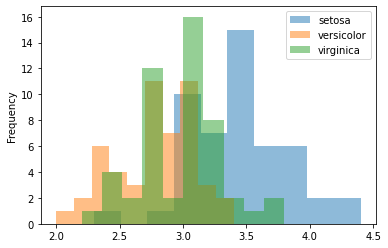

In [7]:
fig, ax = plt.subplots(1,1)

for species in iris['species'].unique():
    width_series = iris[iris['species']==species]['sepal_width']
    width_series.plot.hist(alpha = 0.5, ax=ax, label=species)
plt.legend()
plt.show()

### Box plot

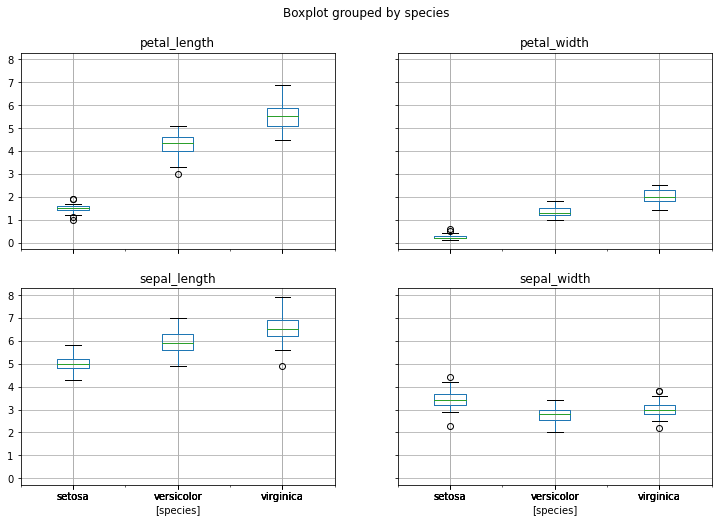

In [8]:
iris.boxplot(by='species', layout=(2,2), figsize=(12,8))
plt.show()

### Violin plot

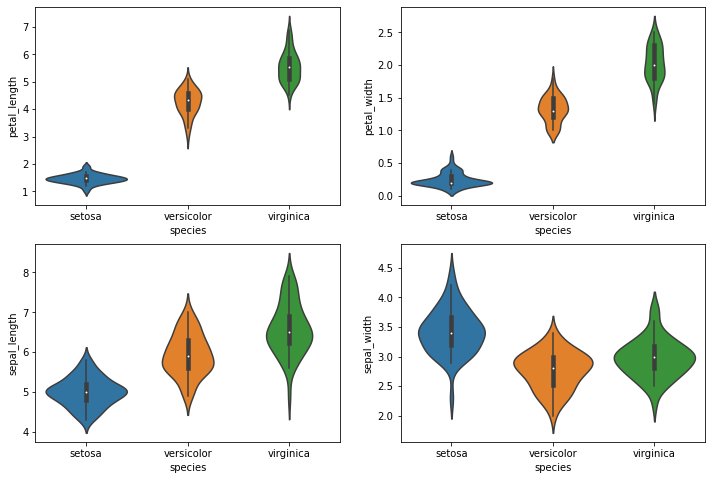

In [9]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['petal_length','petal_width','sepal_length','sepal_width']):
    sns.violinplot(data=iris, x='species', y=col, ax=ax[i//2][i%2])

plt.show()                 

## 데이터의 중심

### 1. 최빈값(mode)
- 빈도가 가장 높은값
- 범주형 데이터의 대표값
- 2개 이상 존재

### 2. 중앙값
- 데이터를 내림차순 해서 가장 중간에 있는 데이터
- 짝수개 일 경우는 중앙에 있는 데이터 두개를 더하고 나눈 값이 중앙값

### 3. 산술평균
- 일반적으로 사용하는 평균
- 극단값 이상치에 영향을 많이 받는 통계량
- 데이터의 개수로 나눔

### 4. 가중평균
- 일반적인 산술 평균 각각의 데이터마다 중요도에 따라서 가중치
- 가중치를 다 더한 값으로 나눠줌

### 5. 기하평균
- 성장률이나 증가율 이런 비율에 대한 데이터를 평균 낼 때 사용
- 음수나 0의 데이터가 있는 경우에는 적용을 못합니다.

#### 편차
- 데이터 값과 평균을 빼준 값

#### 분산
- 편차의 제곱의 합을 데이터 수로 나눈 값
- 편차를 다 더하면 0나오기 때문에 제곱을 진행
- 편차가 큰 데이터 값에 대해 영향정도를 키우기 위해서

#### 표준편차
- 분산의 제곱근을 한 값

In [10]:
import numpy as np
data = np.arange(10, 20, 0.1)

In [11]:
sum_ = 0
for i in data:
    sum_ += i
sum_/len(data)
# data.mean()

14.949999999999978

In [12]:
data.mean()

14.949999999999982

In [13]:
from scipy.stats import trim_mean
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1)
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 3.7
절삭평균 = 3.25
중앙값 = 3.0



In [14]:
from scipy.stats import trim_mean
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1)
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 909090912.3636364
절삭평균 = 4.0
중앙값 = 3.0



In [15]:
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])
data_length = len(data)

if data_length %2 == 0:
    idx = data_length//2
    median = (data[idx] + data[idx+1])/2

else:
    idx = data_length//2
    median = data[idx]
  
print('중앙값 : ', median)

중앙값 :  3


### 가중평균

In [16]:
data = np.array([10, 20, 30, 40, 50 ,60 ,70, 80, 90, 100])
weights = np.array([0.1, 0.05, 0.3, 0.05, 0.15, 0.025, 0.025, 0.05, 0.125 ,0.175])

In [17]:
sum_ = 0
for idx in range(len(data)):
  sum_ += weights[idx]*data[idx]
print(sum_/sum(weights))

53.80952380952381


### 최빈값

In [18]:
import numpy as np
data = np.array([1,1,2,2,2,3,4,5,6,7,7,7,7,7,8,8,9,10])
count_dict = dict()
for d in data:
    if d not in count_dict:
        count_dict[d] = 1
    else:
        count_dict[d] += 1

def func(x):
    return x[1]

sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[0][0]

7

### 편차 표준편차 분산

In [19]:
norm = np.random.normal(10.0, 2.0, 100)

In [20]:
# 평균
norm_mean = norm.mean()
norm_mean

9.89053916741322

In [21]:
# 편차
norm_dev = [i-norm_mean for i in norm]
norm_dev

[1.9469639714204732,
 1.8136805422589397,
 1.5207786353650068,
 -0.34524811008297007,
 -2.6604746070954786,
 -0.6128448721767406,
 -3.1062893296394325,
 0.020563393496976445,
 -1.7150339000081765,
 -0.49655362209285947,
 3.5088686229680484,
 0.7207797706115553,
 -1.7757085521516256,
 0.6303710801416873,
 -2.323129128060999,
 -0.2580809757733782,
 0.1817954664010628,
 3.6696676313548977,
 -1.8144503384748027,
 -1.4602409270222285,
 -0.3057301630109457,
 -2.311967808745999,
 -1.2619741755141423,
 2.3058141475831953,
 1.1182673348162098,
 0.984323143573798,
 -3.197030441441692,
 0.588273110036571,
 -0.9179935584862555,
 1.5733884855432692,
 2.686149570511475,
 -4.015903072872515,
 2.9590854313972788,
 0.8204257250977545,
 0.5876598540098268,
 2.008253752924329,
 1.0079536649462142,
 -0.25719678739869956,
 0.2384526374098943,
 3.869713125289044,
 2.302699079409102,
 0.12711794898254247,
 -1.9412215884985367,
 -0.11770563946928192,
 2.386764169615258,
 -3.101767318570621,
 -1.45687367315410

In [22]:
# 분산
norm_var = sum([i**2 for i in norm_dev])/(len(norm) - 1)
norm_var

3.985009962486461

In [23]:
# 표준편차
import math
math.sqrt(norm_var)
# np.std(norm_var) # 넘파이 내 표준편차 구하는 메서드

1.9962489730708595

### 기하평균

In [24]:
score_rate = [1.1, 2.1, 0.91, 0.14, 0.51]
mul_ = 1
for rate in score_rate:
    mul_ *= rate

geometric_mean = mul_**(1/len(score_rate))
geometric_mean

0.6843374651564551

## 실습

In [25]:
import seaborn as sns
dataset = sns.get_dataset_names()
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [26]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [27]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [28]:
planets[planets['orbital_period'].isnull()].head()

,method,number,orbital_period,mass,distance,year
29,Imaging,1,NaN,NaN,45.52,2005
30,Imaging,1,NaN,NaN,165.00,2007
31,Imaging,1,NaN,NaN,140.00,2004
33,Imaging,1,NaN,NaN,NaN,2008
34,Imaging,1,NaN,NaN,145.00,2013


In [29]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

### Peguine data

In [30]:
import seaborn as sns
dataset = sns.get_dataset_names()

In [31]:
pegnuins = sns.load_dataset('penguins')
pegnuins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [32]:
pegnuins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [33]:
pegnuins[pegnuins['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [34]:
pegnuins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [35]:
bill_length_mm = pegnuins[pegnuins['bill_length_mm'].isnull()==False]
bill_depth_mm = pegnuins[pegnuins['bill_depth_mm'].isnull()==False]
flipper_length_mm = pegnuins[pegnuins['flipper_length_mm'].isnull()==False]
body_mass_g = pegnuins[pegnuins['body_mass_g'].isnull()==False]
notnull_punguins = pegnuins[pegnuins['sex'].isnull()==False]

In [36]:
notnull_punguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


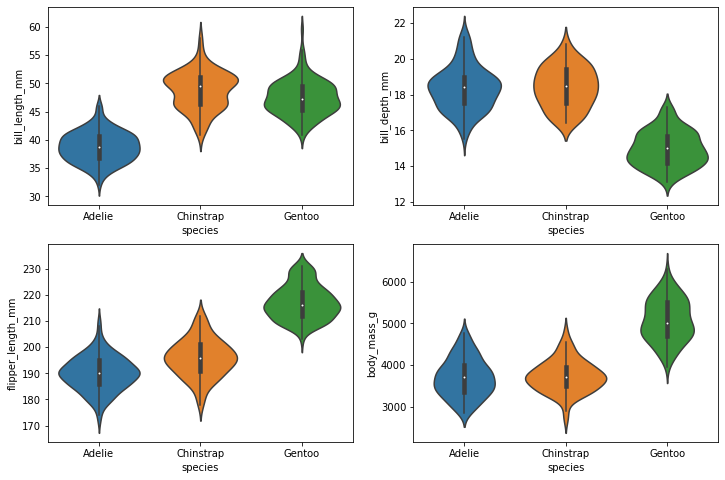

In [37]:
# Violin plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
    sns.violinplot(data=bill_length_mm, x='species', y=col, ax=ax[i//2][i%2])

plt.show()                 

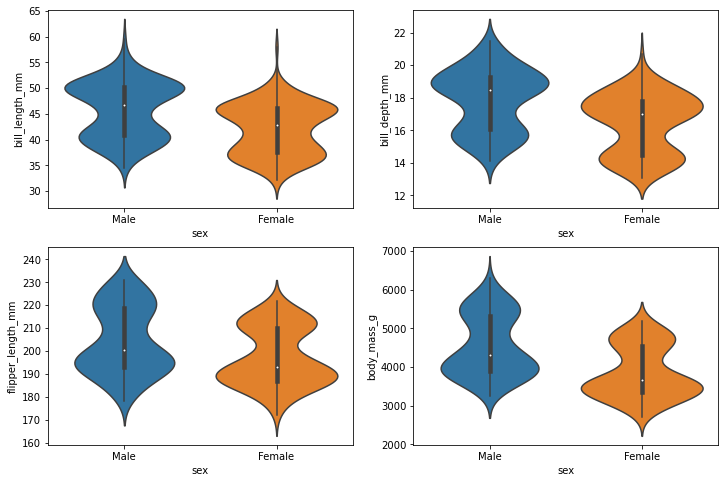

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
    sns.violinplot(data=notnull_punguins, x='sex', y=col, ax=ax[i//2][i%2])

plt.show()        

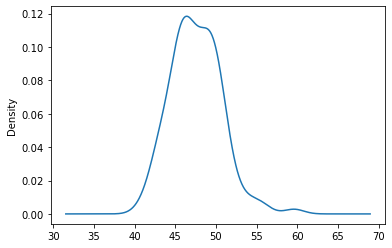

In [39]:
notnull_punguins[notnull_punguins['species']=='Gentoo']['bill_length_mm'].plot.density()
plt.show()